In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
path="/content/drive/MyDrive/dataset/dataset.csv"
df=pd.read_csv(path)
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df.shape

(44898, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
df.describe()

,label
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


0 as **false** 1 as **True**

In [ ]:
df['label'].value_counts()

,count
label,
0,23481
1,21417


In [ ]:
# Count the number of duplicate entries in the 'text' column
num_duplicates = df.duplicated(subset='text').sum()

# Display the number of duplicates
num_duplicates


6252

In [ ]:
# Remove duplicates based on the 'text' column
df = df.drop_duplicates(subset='text')

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Display the updated DataFrame
df


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
38641,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
38642,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
38643,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
38644,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
# Count the number of duplicate entries in the 'text' column
num_duplicates = df.duplicated(subset='text').sum()

# Display the number of duplicates
num_duplicates

0

In [ ]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'politicsNews', 'worldnews'], dtype=object)

TEXT CLEANING

CONVERT TO LOWERCASE

In [ ]:
df['text']=df['text'].str.lower()
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",0


REMOVE SPECIAL CHAR

In [ ]:
df['text']=df['text'].str.replace(r'\w','',regex=True)


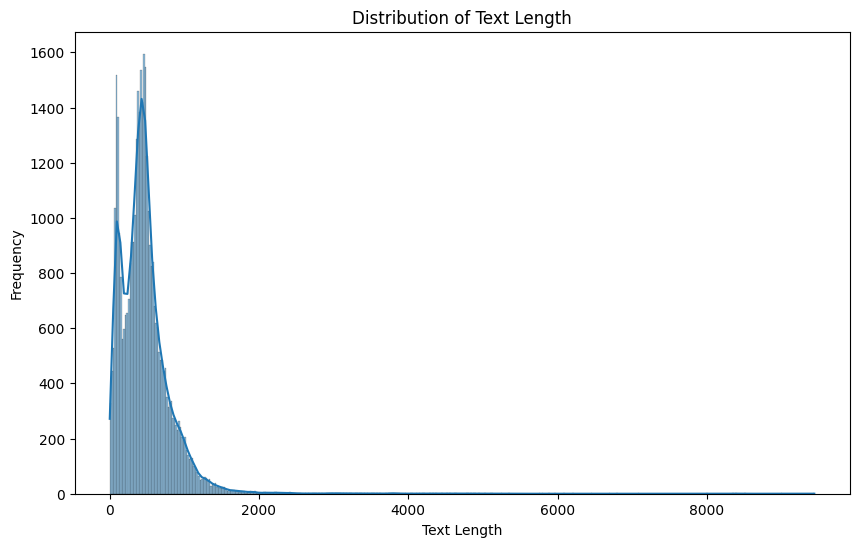

In [ ]:
df['text_length']=df['text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'],kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


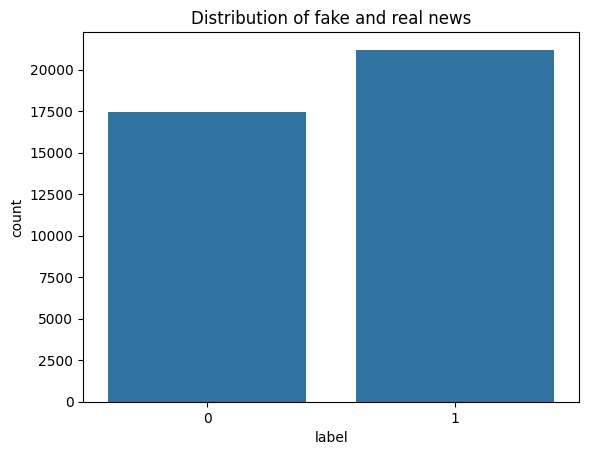

In [ ]:
sns.countplot(x='label',data=df)
plt.title('Distribution of fake and real news')
plt.show()